<a href="https://colab.research.google.com/github/yuxuan123/DenoisingDirtyDocuments/blob/master/Static_Channels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [34]:
import warnings
warnings.filterwarnings("ignore")
import os
from pathlib import Path
import numpy as np 

import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
import xgboost as xgb

! git clone https://github.com/yuxuan123/DenoisingDirtyDocuments.git

fatal: destination path 'DenoisingDirtyDocuments' already exists and is not an empty directory.


In [0]:
root_path = 'DenoisingDirtyDocuments/Data'
train = root_path + '/train'
train_cleaned = root_path + '/train_cleaned'
test = root_path + '/test'
in_dir = test
out_dir = in_dir+'_out'

in_imgs = sorted(in_dir+'/'+x for x in os.listdir(in_dir))

## Median Filtering

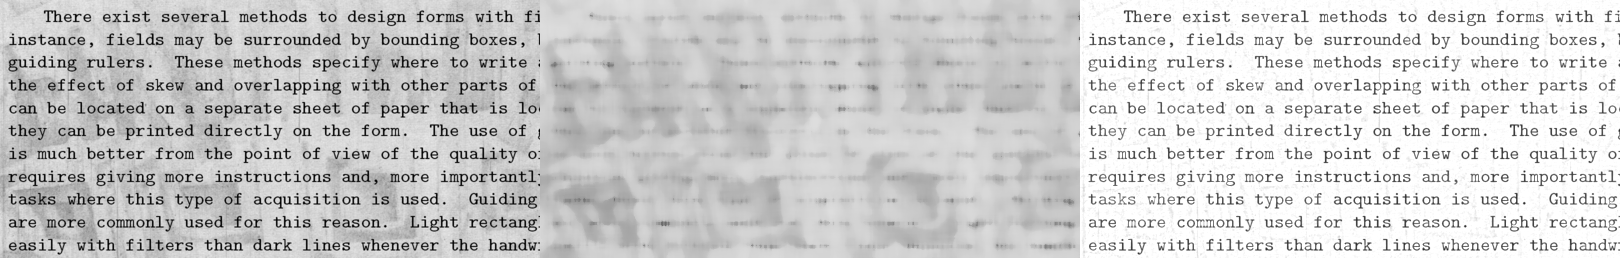

In [13]:
import os
from google.colab.patches import cv2_imshow

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

imgs = load_images_from_folder(train)
med_imgs = []

for img in imgs:
  median = cv2.medianBlur(img, 11)
  median_out = cv2.bitwise_not(cv2.subtract(median, img))
  med_imgs.append(median_out)
  compare = np.concatenate([img, median, median_out], axis=1) #side by side comparison

cv2_imshow(compare)

## Edge Detection, Dilation, Erosion

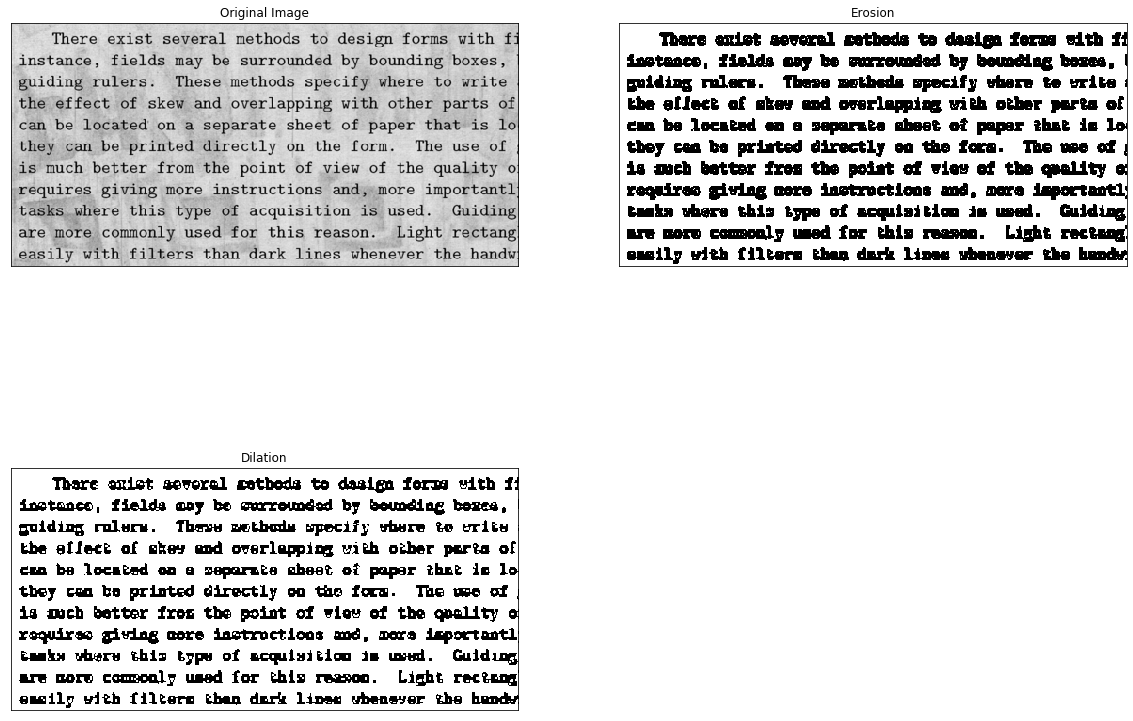

In [22]:
import matplotlib.pyplot as plt

edde_imgs = []
plt.rcParams["figure.figsize"] = (20, 15)

for img in imgs:
  kernel = np.ones((2,2),np.uint8)
  edges = cv2.bitwise_not(cv2.Canny(img, 200, 400))
  erosion = cv2.erode(edges,kernel,iterations = 1)
  dilation = cv2.dilate(erosion,kernel,iterations = 1)
  edde_imgs.append(dilation)

titles = ['Original Image', 'Erosion', 'Dilation']
images = [img, erosion, dilation]
for i in range(3):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


In [0]:
# Convert to pandas data frame
med_imgs_df = pd.DataFrame(med_imgs)
edde_imgs_df = pd.DataFrame(edde_imgs)

(144, 1)
